## Intro


KARL MAKE SURE TO UPDATE AND REFERENCE 

### Goal:
An MNIST image is 784 pixels when unravelled. It is B/W, with values from 0-255. I want to create a ML model which will recognise the number written in the image.

### To Investigate:
How changing the number of hidden layer nodes affects the output. 

How adding layers or changing the nonlinear relationship (activation fn) between the layers affects the output. tanh, sigmoid, relu

Graphing how quickly the model learns and reaches a threshold. 

How to squeeze a very accurate model out of it, maybe combine them? 

something with the back prop?

how does the alpha affect it? 

instead of iterations, until an accuracy is reached? 

should I add some randomness to try find a global min?

trying a different descent - with momentum? 

trying He initialization (typically used for ReLU activation functions) or Xavier

### How it works
Need to transpose first for Matrix Multiplication
#### Forward Propagation
This is how an image will proceed through the network

A[0] = input layer (784 nodes)

A[1] = ReLU( w[1]*A[0]+b[1] ), ReLU is the activation fn, it makes it a nonlinear relationship, RELU is f(x) = x, x>0, =0 x<=0. w is weights and b is biases. (10 nodes)

A[2] = g(w[2]*A[1] +b[2]), g is softmax as this goes to the output layer. softmax is essentially exp() / sum(exp()). gives a probability. (10 nodes, 0-1 probability of being the value 0-9)

#### Backward Propagation
The thing that makes it learn. Want to see how wrong the model was and adjust the weights and biases

what I want to know is how we know how much to change the weights by? 

this is the part I least understand

obviously you have to do it in reverse - so the transpose of the matrix and the differential of the activation fn. 

dz[2] = A[2] - Y, Y is the answer from the catalogue

unsure about this...

dw[2] = 1/m dz[2]* a[1]^T, derivative of the loss fn wrt the weights, m is no of columns (ie number of images as it's been transposed)

db[2] = 1/m sum dz[2], average of the absolute error 

dz[1] = w[2]^T * dz[2] * g'(z[1]), 1st derivative of activation fn 

dw[1] = 1/m dz[1] * A[0]^T

db[1] = 1/m sum(dz[1])

#### Update parameters
need to choose \alpha, learning rate hyperparameterm

for each parameter (eg w[2]) you remove the delta times learning rate (-\alpha* dw[2])

# Code

#### Set up

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#get data
data = pd.read_csv('train.csv')
data = np.array(data) #convert to numpy array 

m,n = data.shape #rows and columns m&n
np.random.shuffle(data) #shuffle

data = data.T #transpose 

labels = data[0] 
X = data[1:]/255 #these will be the imputs, /255 to normalise

data is now nxm, ie 785 x 42000 array. the extra row is the label of 0-9

#### Generate functions

In [15]:
def RELU(a):
    """
    Performs the ReLU function, if the value is above zero it is returned, if it is below zero, zero is returned
    """
    return np.maximum(a,0)

def softmax(a):
    """
    Performs softmax, essentially will get a probability out
    """
    ####Not sure about this one 
    return np.exp(a) / (np.sum(np.exp(a),axis=0)) ###changed back to np.sum

def RELU_prime(a):
    """
    The derivative of the RELU fn. Returns 1 if x>0, 0 if x<=0
    """
  
    
    return a>0 



def initialise():
    """
    Randomly initialises the weights and biases using a normal distribution
    """
    w1 = np.random.normal(size = (10, 784))
    b1 = np.random.normal(size = (10, 1))
    w2 = np.random.normal(size = (10, 10))
    b2 = np.random.normal(size = (10, 1))
    
    return w1,b1,w2,b2


def forwardprop(w1,b1, w2,b2, x):
    """
    Forward propagates the image through the net
    """
    z1 = w1.dot(x) + b1 #apply weights and biases
    a1 = RELU(z1) #activate layer
    
    z2 = w2.dot(a1) + b2 #apply w&b for 2nd layer
    a2 = softmax(z2) #activate for output layer
    
    return z1,a1,z2,a2

def fix(y):
    #called one-hotting? (dk what that means)
    Y = np.zeros((y.size, y.max() + 1))
    Y[np.arange(y.size), y] = 1
    return Y.T

def backprop(z1,a1, z2,a2, w1,w2, x,y): #y is labels 
    global m 
    #need to get y in a nice format before putting it in here
    y = fix(y)
    
    dz2 = a2 - y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2,1,keepdims=True)
#     print('backpropworkings: dz2,db2')
#     print(dz2.shape)
# #     print(dw2.shape)
#     print(db2.shape)
    
#     print(dz2)
#     print(dw2)
#     print(db2)
#     print('np.sum')
#     print(np.sum(dz2))
#     print('1/m * np.sum')
#     print(1/m * np.sum(dz2,1))
#     print('sum')
#     print(sum(dz2).shape)
    
    
    dz1 = (w2.T).dot(dz2) * RELU_prime(z1)
    dw1 = 1/m * dz1.dot(x.T)
    db1 = 1/m * np.sum(dz1,1, keepdims=True)
    
    return dw1, db1,dw2,db2

def update(w1,b1, w2,b2, dw1,db1, dw2,db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1,b1, w2,b2
        
def accuracy(prediction,y):
    return np.sum(prediction==y)/y.size


In [16]:
def LEARN(x,y, iterations, alpha=0.7):
    w1,b1,w2,b2 = initialise()
#     print('init w1b1')
#     print(w1.shape,b1.shape,w2.shape,b2.shape)
    
    for i in range(iterations):
        z1,a1,z2,a2 = forwardprop(w1,b1,w2,b2, x)
#         print('forward, z1,a1,z2,a2')
#         print(z1.shape,a1.shape,z2.shape,a2.shape)
        
        dw1,db1, dw2,db2 = backprop(z1,a1, z2,a2, w1,w2, x,y)
#         print('backward,dw1,db1, dw2,db2')
#         print(dw1.shape,db1.shape, dw2.shape,db2.shape)
        
        w1,b1, w2,b2 = update(w1,b1, w2,b2, dw1,db1, dw2,db2, alpha)
        
        if i % 50 ==0:
            print(i)
#             print('a2', a2.shape)
            prediction = np.argmax(a2,axis=0)
            print(prediction.shape)
            print(prediction)
#             print("pred",prediction.shape)
#             print(prediction>0)
            print("accuracy",accuracy(prediction,y))
    return w1,b1,w2,b2

In [18]:
w1,b1,w2,b2 = LEARN(X,labels,800)#800)

0
(42000,)
[5 9 0 ... 3 1 9]
accuracy 0.08416666666666667
50
(42000,)
[0 6 5 ... 3 9 9]
accuracy 0.33371428571428574
100
(42000,)
[7 9 0 ... 1 9 9]
accuracy 0.4670238095238095
150
(42000,)
[7 9 0 ... 1 9 9]
accuracy 0.5339285714285714
200
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.5975714285714285
250
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.6359761904761905
300
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.6361666666666667
350
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.6978571428571428
400
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.7159285714285715
450
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.727547619047619
500
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.7300714285714286
550
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.7444047619047619
600
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.7386190476190476
650
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.7577619047619047
700
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.7638571428571429
750
(42000,)
[7 9 0 ... 1 4 9]
accuracy 0.7720714285714285


In [33]:
def predict(w1,b1,w2,b2,x):
    #must get a single image
    _,_,_, a2 = forwardprop(w1,b1,w2,b2, x)
    output = np.argmax(a2,axis=0)
    return output[0]

def test_prediction(ind, w1,b1,w2,b2):
    global X,labels
    image = X[:,ind]
    pred = predict(w1,b1,w2,b2, image)
    label = labels[ind]
    print('Label:', label)
    print('Prediction ', pred)
    
    image = image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()
    

In [34]:
# test_prediction(0,w1,b1,w2,b2)
# print([i for i in predict(w1,b1,w2,b2,X) if i>0])

#so it hits the same accuracy (0.983) because it predicts them all to be zeros, and 0 happens
#to come up that many times 

#/var/folders/88/k7cqn0rn6tq41vl_nhn7qdfw0000gn/T/ipykernel_78736/2736214406.py:12: RuntimeWarning: overflow encountered in exp
  #return np.exp(a) / (np.sum(np.exp(a)))
#/var/folders/88/k7cqn0rn6tq41vl_nhn7qdfw0000gn/T/ipykernel_78736/2736214406.py:12: RuntimeWarning: invalid value encountered in divide
  #return np.exp(a) / (np.sum(np.exp(a)))
    
    
##ahhhhh it's working!! changed np.sum() to sum() in softmax!!!

In [35]:
# w1 = np.random.normal(size = (10, 784))
# print(X.shape)
# print(w1.shape)
# b1 = np.random.normal(size = (10, 1))
# print((w1.dot(X)).shape)
# print(b1.shape)

6441
Label: 8
Prediction  8


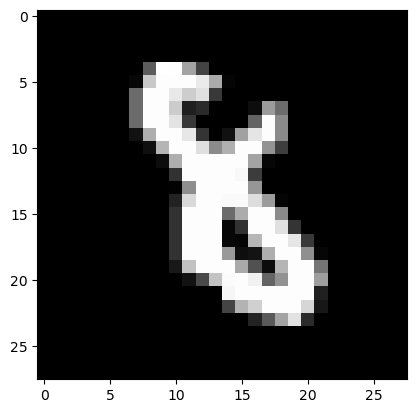

412
Label: 0
Prediction  7


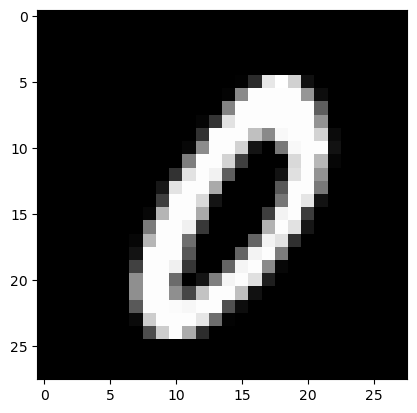

20398
Label: 5
Prediction  8


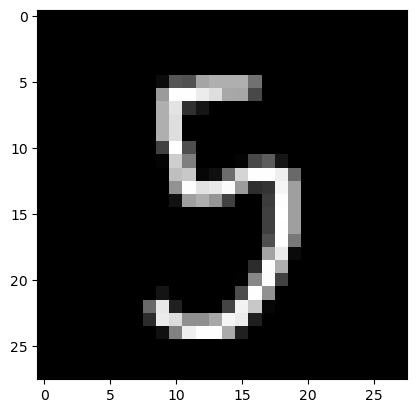

40901
Label: 4
Prediction  7


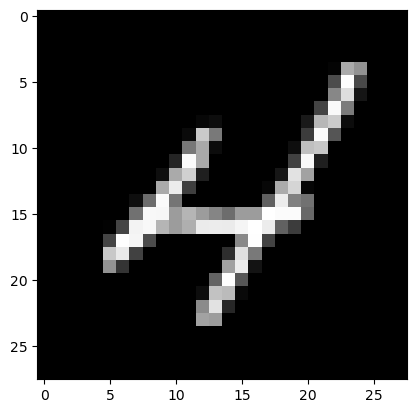

20647
Label: 1
Prediction  8


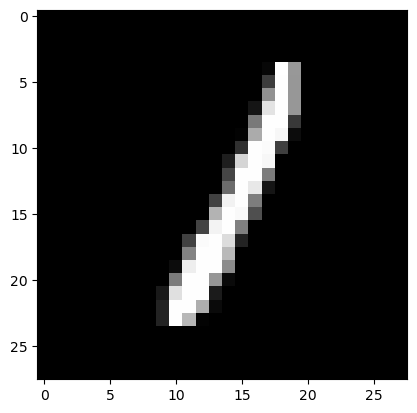

4534
Label: 3
Prediction  8


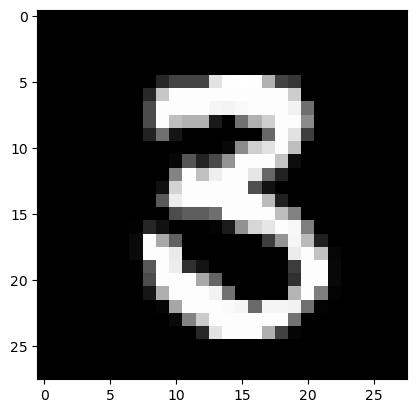

16513
Label: 1
Prediction  8


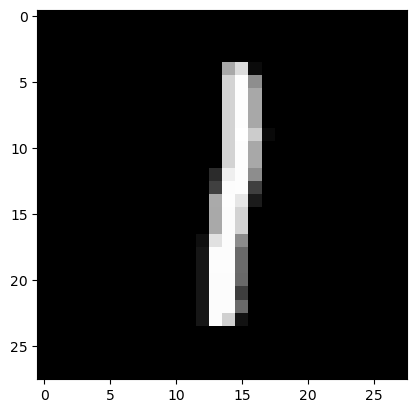

12995
Label: 1
Prediction  8


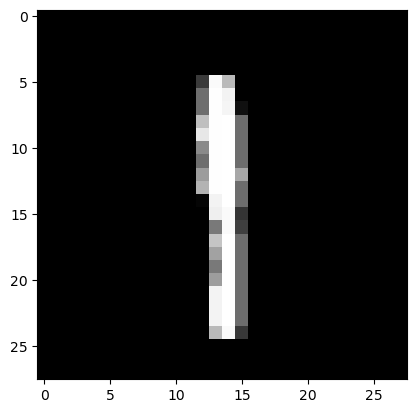

36554
Label: 0
Prediction  7


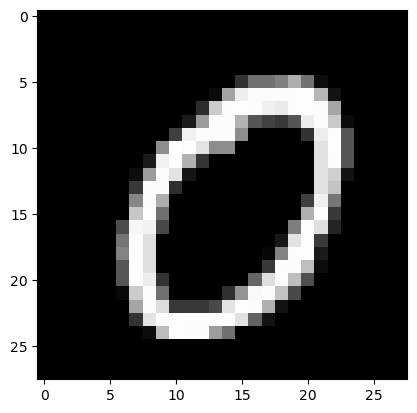

27277
Label: 5
Prediction  8


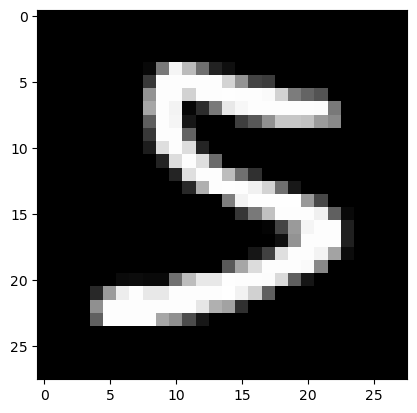

2362
Label: 2
Prediction  8


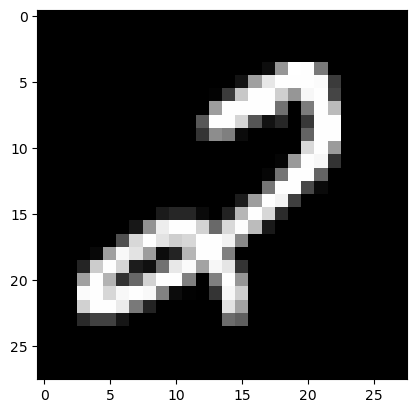

15539
Label: 2
Prediction  8


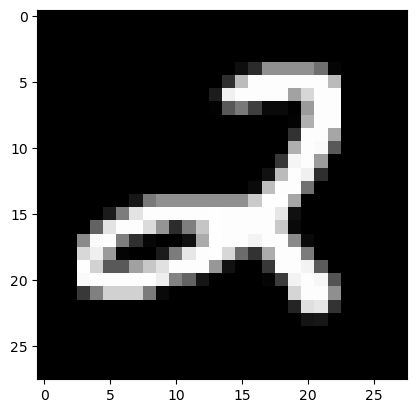

1130
Label: 3
Prediction  8


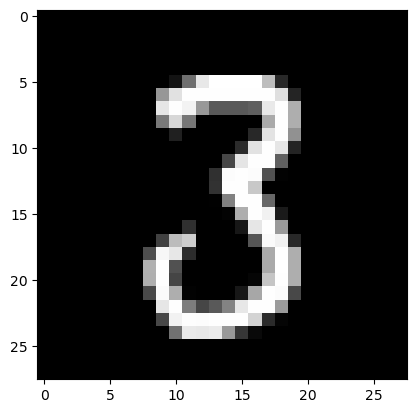

30876
Label: 9
Prediction  7


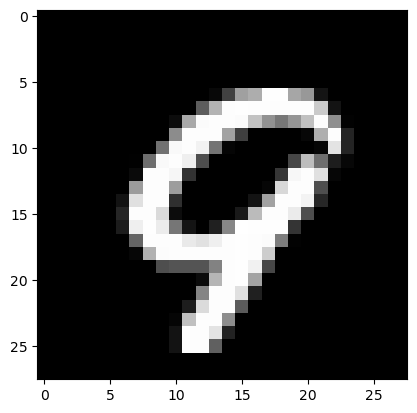

33492
Label: 3
Prediction  8


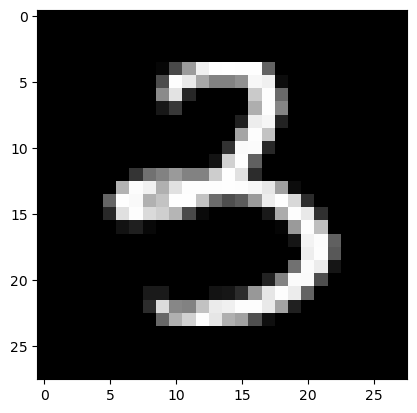

23784
Label: 6
Prediction  8


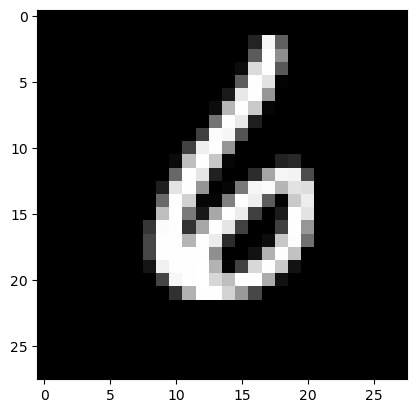

10309
Label: 0
Prediction  7


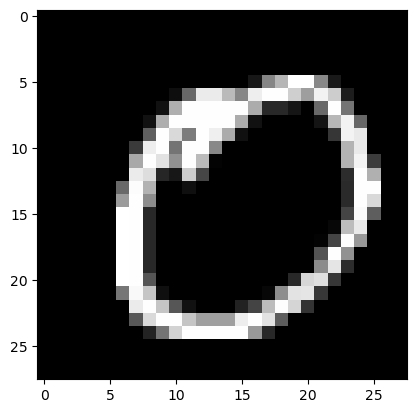

15580
Label: 0
Prediction  7


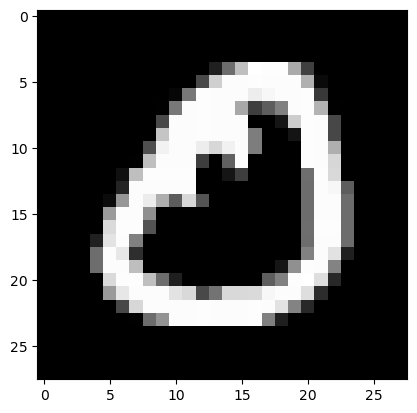

13038
Label: 9
Prediction  7


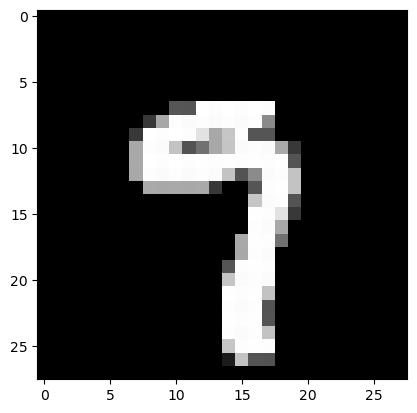

19868
Label: 6
Prediction  8


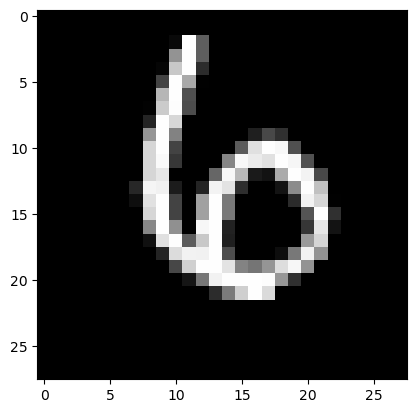

1624
Label: 4
Prediction  8


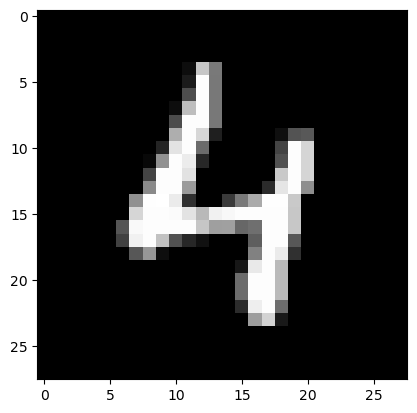

29681
Label: 0
Prediction  7


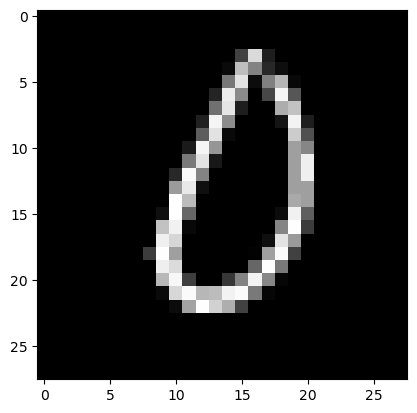

23161
Label: 3
Prediction  8


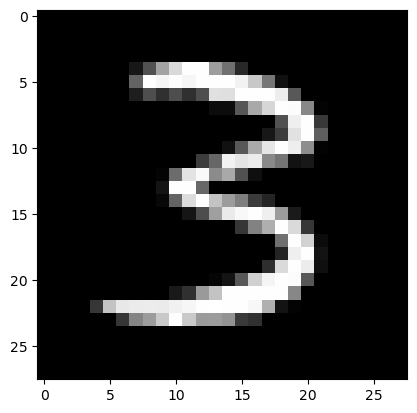

32258
Label: 1
Prediction  8


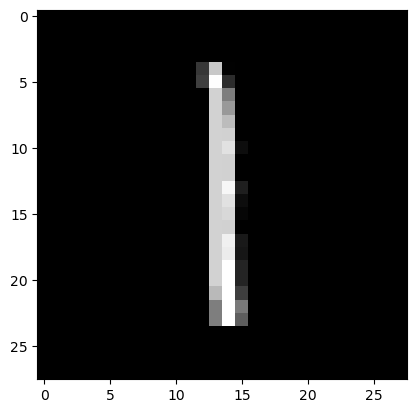

31675
Label: 3
Prediction  8


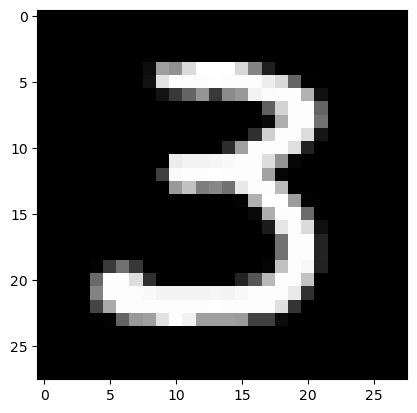

20947
Label: 1
Prediction  8


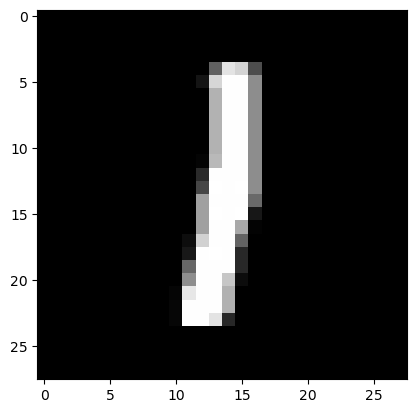

40947
Label: 6
Prediction  8


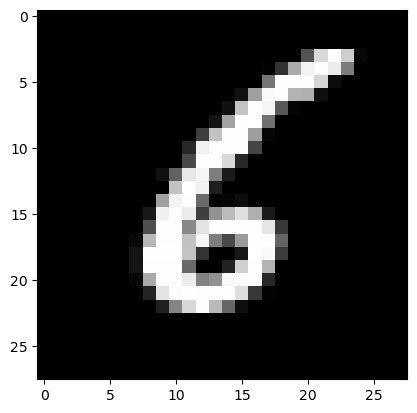

10828
Label: 2
Prediction  8


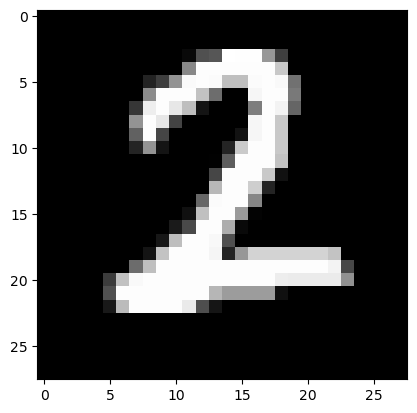

26711
Label: 4
Prediction  8


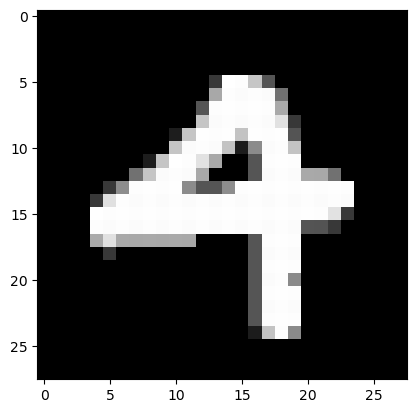

18016
Label: 1
Prediction  8


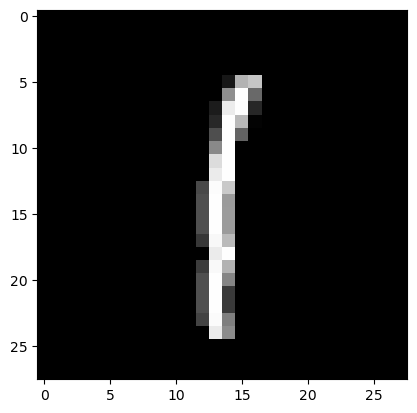

6209

In [51]:
# print(X[:,0])

for i in range(0,30):
    index = np.random.randint(0,42000)
    print(index)
    test_prediction(index,w1,b1,w2,b2)
# #     test_prediction(i,w1,b1,w2,b2)
# test_prediction(1000,w1,b1,w2,b2)

###very strange - why does it not give only 1 value? now I don't know what the accuracy is even checking 

np.random.randint(5000,50000)

In [186]:
w1

array([[ 0.69154633,  0.83871612,  0.13190409, ...,  0.35108065,
         0.05349608,  0.54715249],
       [-0.95372475,  0.01749799,  0.67007965, ...,  1.16971063,
         0.64480618,  0.14773004],
       [-0.37938122,  0.08545644, -0.29876336, ..., -0.63527124,
        -0.20279904, -1.50977255],
       ...,
       [-2.51620239,  0.16478896, -1.10336293, ...,  0.77342129,
         1.08831544,  0.4200272 ],
       [ 0.62678304,  0.09054787,  0.41982558, ...,  0.94293606,
        -0.26458147,  0.26878884],
       [ 0.84553208,  0.02830935,  0.90015618, ...,  1.43781354,
        -1.67160696,  1.19104016]])